In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow import keras
layers = keras.layers
models = keras.models

In [ ]:
df = pd.read_csv("bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df['category'].value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [6]:
train_size = int(len(df) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 1780
Test size: 445


In [7]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [8]:
train_y, test_y = train_test_split(df['category'], train_size)
train_x, test_x = train_test_split(df['text'], train_size)

In [9]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)

In [10]:
tokenize.fit_on_texts(train_x)
x_train = tokenize.texts_to_matrix(train_x)
x_test = tokenize.texts_to_matrix(test_x)

In [11]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

In [12]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
batch_size = 32
epochs = 10
drop_ratio = 0.5

In [14]:
# Memulai proses build model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7375 - loss: 0.7733 - val_accuracy: 0.9494 - val_loss: 0.1506
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.0409 - val_accuracy: 0.9494 - val_loss: 0.1427
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.9607 - val_loss: 0.1195
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.9607 - val_loss: 0.1227
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9551 - val_loss: 0.1202
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9551 - val_loss: 0.1232
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9551 - val_loss: 0.1195
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9551 - val_loss

In [16]:
# Mulai melakukan tindakan evaluasi terhadap hasil akurasi yang dimiliki oleh model yang sudah dilakukan training
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9617 - loss: 0.1304
Test loss: 0.1252785176038742
Test accuracy: 0.9595505595207214


In [17]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [18]:
batch_size = 16
epochs = 10
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 10, drop_ratio: 0.4
	Test loss: 0.13482409715652466
	Test accuracy: 0.9617977738380432


In [19]:
text_labels = encoder.classes_
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_x.iloc[i][:50], "...")
    print('Label awal: ' + test_y.iloc[i])
    print("Label hasil prediksi: " + predicted_label + "\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
hobbit picture  four years away  lord of the rings ...
Label awal: entertainment
Label hasil prediksi: entertainment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
game firm holds  cast  auditions video game firm b ...
Label awal: tech
Label hasil prediksi: tech

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
clarke plans migrant point scheme anyone planning  ...
Label awal: politics
Label hasil prediksi: politics

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
radcliffe will compete in london paula radcliffe w ...
Label awal: sport
Label hasil prediksi: sport

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
serena becomes world number two serena williams ha ...
Label awal: sport
Label hasil prediksi: sport

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ultimate game  award for doom 3 sci-fi shooter doo ...
Label awal: tech
Label hasil prediksi: tech

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
algeria hit by further gas riots algeria suffered  ...
Label awal: business
Label hasil prediksi: busin

In [20]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [21]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Label awal : ', fontsize=25)
    plt.xlabel('Label prediksi : ', fontsize=25)

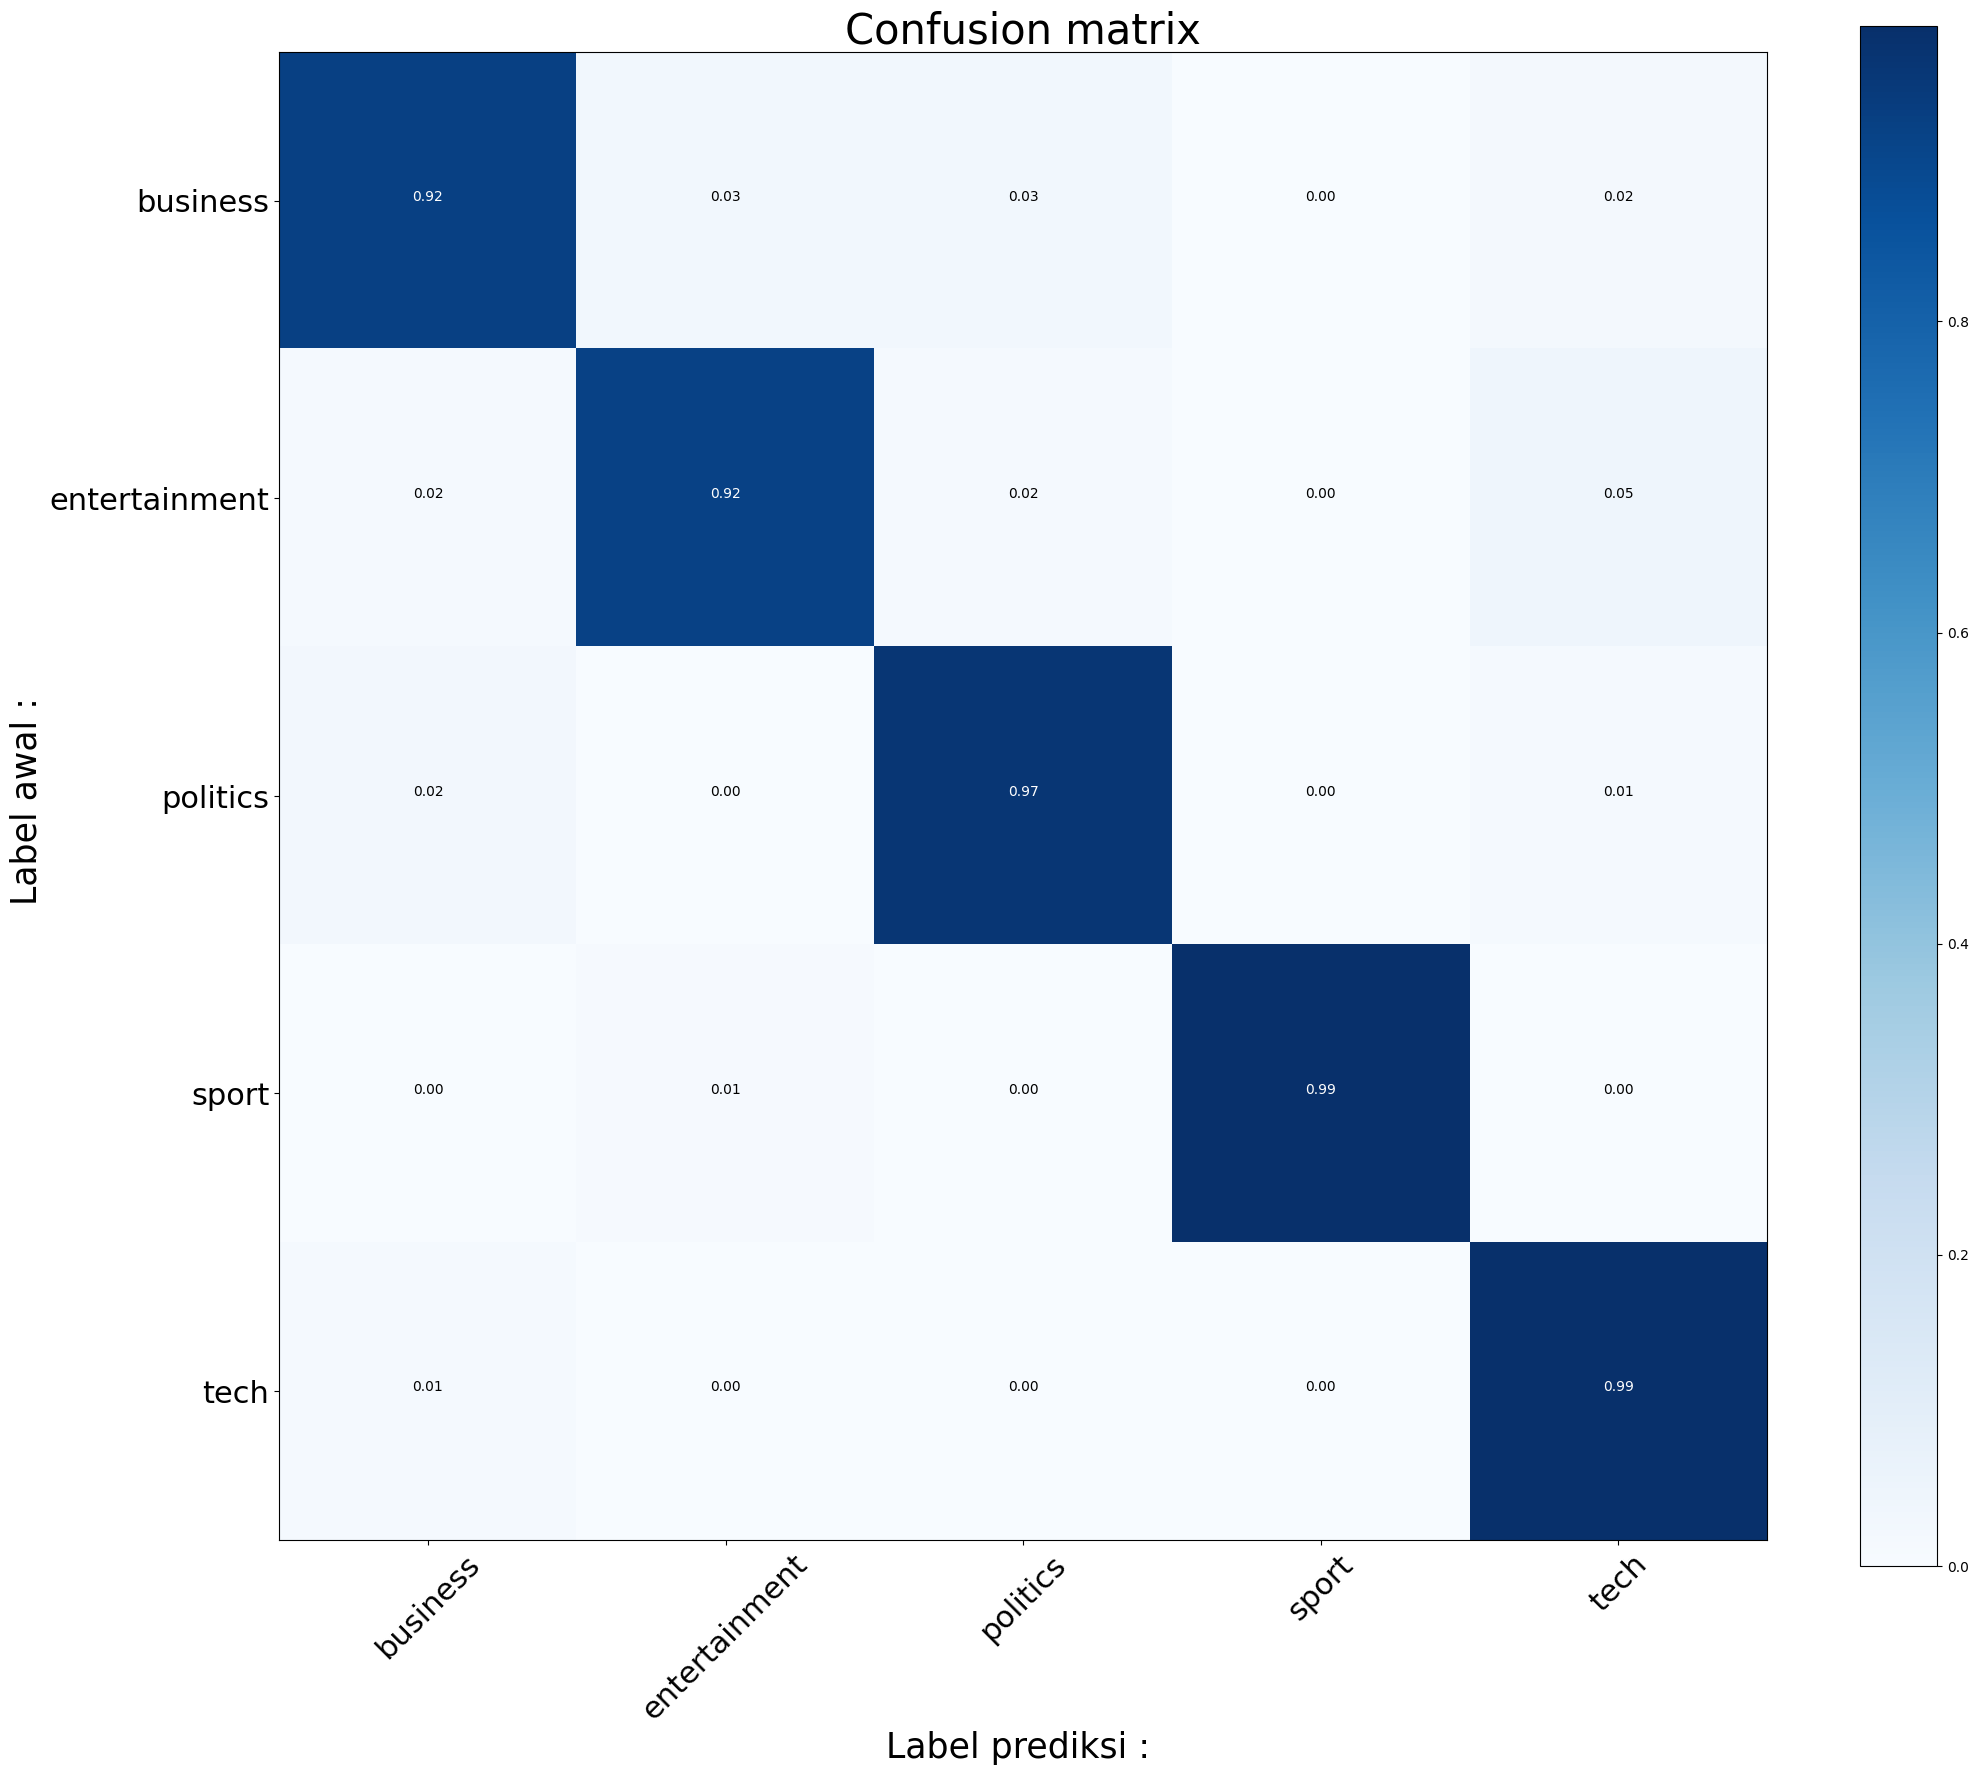

In [22]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [23]:
from keras.models import load_model

# Simpan model ke file HDF5
model.save('my_model.h5')

In [29]:
# Berita baru yang akan diuji
new_article = """
   hague  given up  his pm ambition former conservative leader william hague says he will not stand for the leadership again  having given up his ambition to be prime minister.  mr hague  43  told the daily telegraph he would now find a life dominated by politics too  boring  and unfulfilling. mr hague  who stepped down after his party s 2001 election defeat  does not rule out a return to the front bench. he also told the paper he hopes to remain mp for richmond  north yorks  and start a family with wife ffion. mr hague  who recently had published the biography of william pitt the younger  also said he wanted to continue writing books and speech-writing.  he told the newspaper:  i don t know whether i will ever go back on to the front  but don t rush me.  asked if he would stand for the leadership again  mr hague replied:  no. definitely not.  his determination to stay away from a central role will disappoint some senior conservative members  who say the party needs him. tim collins  the shadow education secretary  said last week it would be a  huge boost  to the party if mr hague returned to the front bench. mr hague became an mp at 27 and leader of the opposition at 36. he said:  i feel fortunate that  by the age of 40  i had crammed in an entire political career.  i had been in the cabinet and been leader of the party  so now i can branch out into other things...it is a very liberating feeling.  mr hague added that he may have misjudged his own ambition to be prime minister.  maybe i wasn t as driven by politics as i thought i was   he said.
"""

# Pra-pemrosesan berita baru
new_article_processed = [new_article]  # Membuat list agar sesuai dengan input model

# Tokenisasi teks baru
new_article_matrix = tokenize.texts_to_matrix(new_article_processed)

# Prediksi menggunakan model yang sudah dilatih
prediction = model.predict(new_article_matrix)

# Menampilkan label kelas dan label yang diprediksi
predicted_label = text_labels[np.argmax(prediction)]
print("Berita: ", new_article)
print("Label hasil prediksi: ", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Berita:  
   hague  given up  his pm ambition former conservative leader william hague says he will not stand for the leadership again  having given up his ambition to be prime minister.  mr hague  43  told the daily telegraph he would now find a life dominated by politics too  boring  and unfulfilling. mr hague  who stepped down after his party s 2001 election defeat  does not rule out a return to the front bench. he also told the paper he hopes to remain mp for richmond  north yorks  and start a family with wife ffion. mr hague  who recently had published the biography of william pitt the younger  also said he wanted to continue writing books and speech-writing.  he told the newspaper:  i don t know whether i will ever go back on to the front  but don t rush me.  asked if he would stand for the leadership again  mr hague replied:  no. definitely not.  his determination to stay away from a central role will disappoint some senior conservative memb

In [30]:
# Ekstrak kelas yang digunakan oleh LabelEncoder
classes = encoder.classes_

# Menyimpan kelas ke dalam file .npy
np.save('classes.npy', classes)

# Menyimpan file kelas ke lokasi yang Anda inginkan (misalnya, dalam folder proyek)
np.save('classes.npy', classes)
